In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('placement.csv')

In [6]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [7]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [9]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961240
std,0.615898
min,4.890000
25%,6.550000
50%,6.960000
75%,7.370000
max,9.120000


<Axes: >

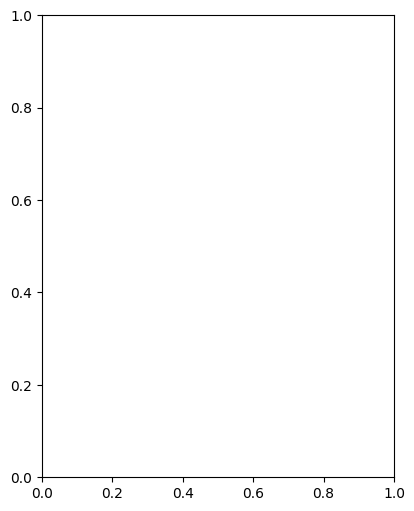

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
# sns.distplot(df['cgpa'])
# plt.subplot(1,2,2)
# sns.distplot(df['package'])

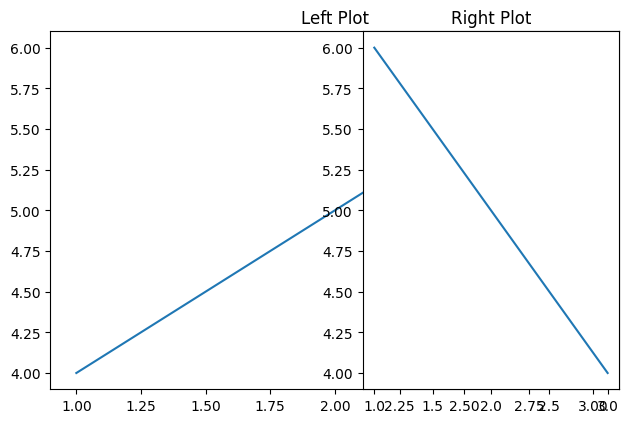

In [11]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Left Plot")
plt.subplot(1,2,2)
plt.plot([1, 2, 3], [6, 5, 4])
plt.title("Right Plot")
plt.tight_layout() # Adjusts spacing to avoid overlap
plt.show()


Text(0.5, 1.0, 'First Plot')

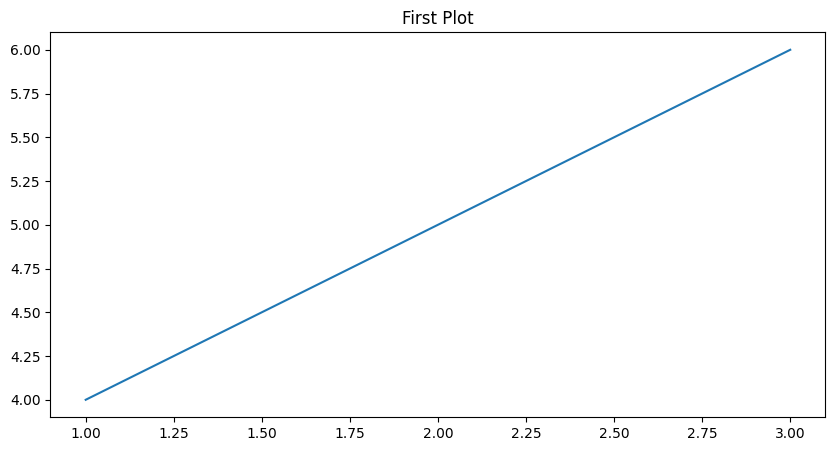

In [21]:
plt.figure(figsize=(10, 5))

# First subplot (left)
# plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('First Plot')

<ipython-input-30-9e3eeae46293>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-30-9e3eeae46293>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


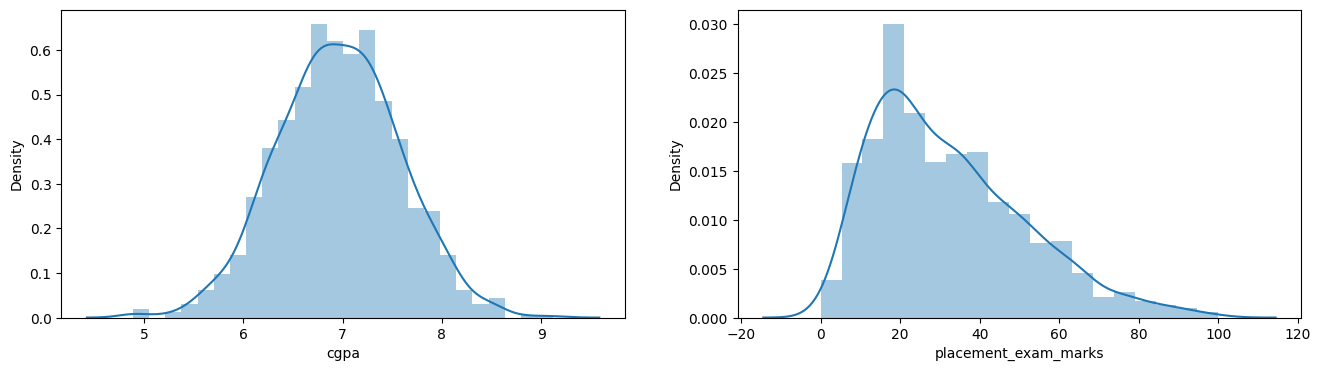

In [30]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

sns.distplot(df['cgpa'])


plt.subplot(1,2,2)

sns.distplot(df['placement_exam_marks'])

plt.show()

In [33]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [34]:
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [37]:
df[(df['cgpa'] > 8.80) |(df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [38]:
new_df=df[(df['cgpa']<8.80)&(df['cgpa']>5.11)]

In [39]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [40]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [41]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [42]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [43]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [44]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [45]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [46]:
df['cgpa']=np.where(df['cgpa']>upper_limit,
                    upper_limit,
                    np.where(df['cgpa']<lower_limit,
                             lower_limit,
                             df['cgpa']))

In [47]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
